<a href="https://colab.research.google.com/github/yogee2406/Breast-cancer-ML_Yogeeta.ipynb/blob/main/ML2_GENDER_RECOGNITION_BY_VOICE_Yogeeta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT DESCRIPTION:**

**Company Introduction**

Your client for this project is a Telecom company.

They are a leading telecom company with 5 million users.

They want to keep track of the number of male and female users but as the user count increases the task becomes more tedious.

They want to automate the process of keeping track of male and female users using their voice.

Their research and development teams are trying to understand the **acoustic properties** of the voice and speech so that they can use it to enhance the customer experience in their new product.


**Current Scenario**

Determining a person’s gender as male or female, based upon a sample of their voice, initially seems to be an easy task.

Often, the human ear can easily detect the difference between a male or a female voice within the first few spoken words.

However, designing a computer program to do this turns out to be a bit trickier.
Currently, the company is keeping track by manually entering the data for the user being male or female by listening to their voice which is a tedious task for the employees.

# PROBLEM STATEMENT

The current process suffers from the following problems:

The current process is a manual classification of gender using their voice.
This is very tedious and time-consuming as it needs to be repeated every time a new customer joins.

The company has hired you as a data science consultant.

They want to automate the process of predicting the male or female voice using acoustic properties of the voice or speech rather than doing this manual work.

**Your Role**

You are given a dataset consisting of recorded voice samples, collected from male and female speakers.
Your task is to build a classification model using the dataset.
Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

**Project Deliverables**

Deliverable: Gender prediction using voice.
Machine Learning Task: Classification
Target Variable: label
Win Condition: N/A (best possible model)

**Evaluation Metric**

The model evaluation will be based on the **F1 Score** score.

# Dataset Feature Description

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech.

The column **label** is also present in the dataset which has two values male and female.

This is the data that we have to predict for future samples.


The dataset is divided into two parts: Train, and Test sets.

Train Set:
The train set contains 2851 rows and 22 columns.
The last column label is the target variable.

Test Set:
The test set contains 317 rows and 21 columns.
The test set doesn’t contain the label column.
It needs to be predicted for the test set.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection, sklearn.linear_model, sklearn.svm, sklearn.metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
df=pd.read_csv("/voice_train.csv")

In [ ]:
df.describe()

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,...,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000
mean,1591.565416,0.180923,0.057143,0.185722,0.140349,0.224730,0.084381,3.118469,35.808329,0.895312,...,0.165481,0.180923,0.142891,0.036834,0.258968,0.833608,0.052634,5.075745,5.023111,0.173933
std,909.939169,0.029796,0.016588,0.036175,0.048628,0.023509,0.042728,4.163727,131.430900,0.044795,...,0.076918,0.029796,0.032191,0.019182,0.029806,0.525565,0.062982,3.526201,3.525193,0.119463
min,1.000000,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,...,0.000000,0.039363,0.055565,0.009775,0.108696,0.007812,0.004883,0.007812,0.000000,0.000000
25%,808.500000,0.163739,0.042082,0.169726,0.111139,0.208756,0.042663,1.638410,5.604497,0.862190,...,0.118100,0.163739,0.117578,0.018223,0.253968,0.423799,0.007812,2.207031,2.183594,0.099591
50%,1590.000000,0.184848,0.059151,0.190067,0.140229,0.225729,0.094235,2.183320,8.255809,0.901840,...,0.186667,0.184848,0.140678,0.046921,0.271186,0.767578,0.023438,4.992188,4.968750,0.139159
75%,2382.500000,0.199061,0.066891,0.210650,0.175690,0.243700,0.114208,2.932962,13.649354,0.928727,...,0.221341,0.199061,0.169593,0.047904,0.277457,1.180411,0.070312,7.078125,7.042969,0.209525
max,3167.000000,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,...,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [ ]:
df.head(5)

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,765,0.162337,0.058206,0.174065,0.100225,0.196512,0.096287,2.127226,7.815129,0.921533,...,0.162337,0.095852,0.016754,0.235294,0.406033,0.046875,3.484375,3.437500,0.155348,male
1,3071,0.161653,0.057435,0.170138,0.157522,0.182929,0.025407,6.968850,60.968047,0.870409,...,0.161653,0.163486,0.015601,0.204082,0.595161,0.170898,3.979492,3.808594,0.209073,female
2,1546,0.165290,0.061891,0.135071,0.118468,0.225176,0.106708,2.631865,12.629116,0.918897,...,0.165290,0.120050,0.035088,0.222222,0.458577,0.087891,1.015625,0.927734,0.459834,male
3,410,0.188100,0.055735,0.206028,0.130493,0.229470,0.098977,1.538406,5.145753,0.914325,...,0.188100,0.108470,0.021305,0.145455,0.493229,0.125000,4.734375,4.609375,0.105202,male
4,2689,0.187497,0.044226,0.190071,0.156800,0.215435,0.058635,1.653083,5.839465,0.907477,...,0.187497,0.154529,0.048338,0.279070,1.113502,0.023438,8.765625,8.742188,0.103095,female


In [ ]:
df.tail(5)

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
2846,3092,0.166738,0.052677,0.169427,0.162650,0.189223,0.026573,7.550412,76.134526,0.865282,...,0.166738,0.152651,0.022727,0.208333,0.174154,0.161133,0.214844,0.053711,0.136364,female
2847,1095,0.198718,0.058959,0.217333,0.143111,0.252000,0.108889,1.116666,3.569725,0.917123,...,0.198718,0.139322,0.050473,0.279070,0.792092,0.023438,4.968750,4.945312,0.155766,male
2848,1130,0.202333,0.063001,0.221946,0.137544,0.264817,0.127273,2.000371,6.681799,0.873847,...,0.202333,0.123610,0.047291,0.269663,1.190168,0.023438,7.429688,7.406250,0.093438,male
2849,1294,0.181799,0.058102,0.192037,0.123670,0.225568,0.101897,1.091660,4.009295,0.925575,...,0.181799,0.110586,0.049741,0.274286,0.789062,0.023438,4.359375,4.335938,0.062312,male
2850,860,0.167732,0.066225,0.171886,0.112598,0.225196,0.112598,0.822981,3.103282,0.953210,...,0.167732,0.126107,0.048096,0.279070,0.813616,0.023438,6.023438,6.000000,0.123384,male


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        2851 non-null   int64  
 1   meanfreq  2851 non-null   float64
 2   sd        2851 non-null   float64
 3   median    2851 non-null   float64
 4   Q25       2851 non-null   float64
 5   Q75       2851 non-null   float64
 6   IQR       2851 non-null   float64
 7   skew      2851 non-null   float64
 8   kurt      2851 non-null   float64
 9   sp.ent    2851 non-null   float64
 10  sfm       2851 non-null   float64
 11  mode      2851 non-null   float64
 12  centroid  2851 non-null   float64
 13  meanfun   2851 non-null   float64
 14  minfun    2851 non-null   float64
 15  maxfun    2851 non-null   float64
 16  meandom   2851 non-null   float64
 17  mindom    2851 non-null   float64
 18  maxdom    2851 non-null   float64
 19  dfrange   2851 non-null   float64
 20  modindx   2851 non-null   floa

**Data Pre-processing**

In [ ]:
# Checking for Null values
df.isnull().sum()

Id          0
meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

**Encoding labels from string to boolean value**

In [ ]:
df.replace(to_replace="male", value=1, inplace=True)
df.replace(to_replace="female", value=0, inplace=True)
df.label.unique()

array([1, 0])

**Splitting the data for training and testing**

In [ ]:
xData=df.iloc[:,:-1]
yData=df.iloc[:,-1]
xData.shape, yData.shape

((2851, 21), (2851,))

In [ ]:
TRAINSPLIT = 0.8

xTrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(xData, yData, train_size=TRAINSPLIT)
xTrain.shape, yTrain.shape

((2280, 21), (2280,))

# Exploratory Data Analysis

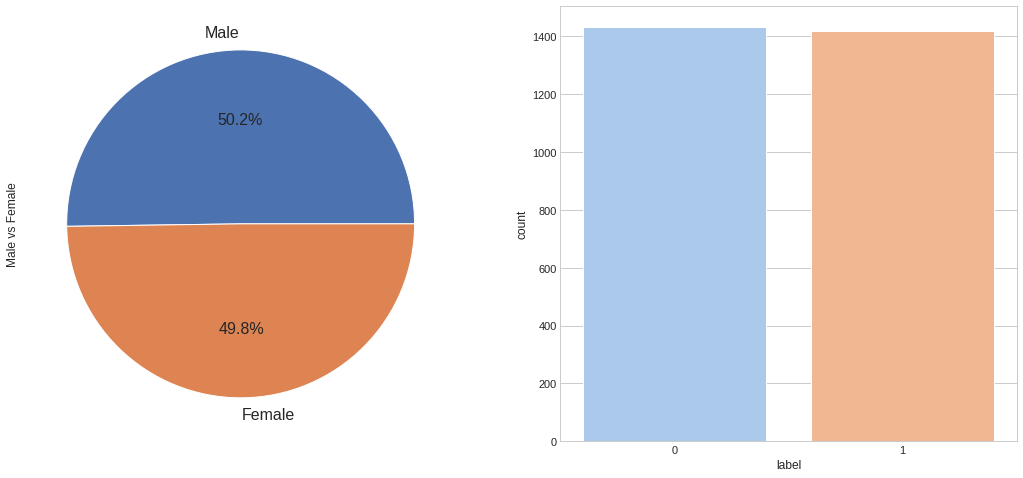

In [ ]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
df.label.value_counts().plot(kind="pie",
                                           fontsize=16,
                                           labels=["Male", "Female"],
                                           ylabel="Male vs Female",
                                           autopct='%1.1f%%');

plt.subplot(1, 2, 2)
sns.countplot(x="label",data=df, palette="pastel")
plt.show()

# Correlation between different features and our target variable

**Correlation coefficient**

The correlation coefficient is a statistical measure of the strength of the relationship between the relative movements of two variables. The values range between -1.0 and 1.0. A calculated number greater than 1.0 or less than -1.0 means that there was an error in the correlation measurement. A correlation of -1.0 shows a perfect negative correlation, while a correlation of 1.0 shows a perfect positive correlation. A correlation of 0.0 shows no linear relationship between the movement of the two variables.

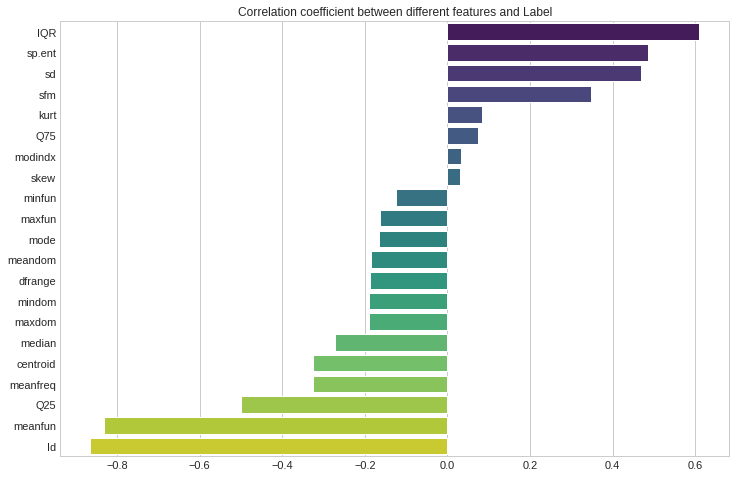

In [ ]:
plt.figure(figsize=(12,8))
data = df.corr()["label"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    labels.append(indices[i])
    corr.append(data[i])
sns.barplot(x=corr, y=labels, palette='viridis')
plt.title('Correlation coefficient between different features and Label')
plt.show()

# Distribution of meanfun in our data

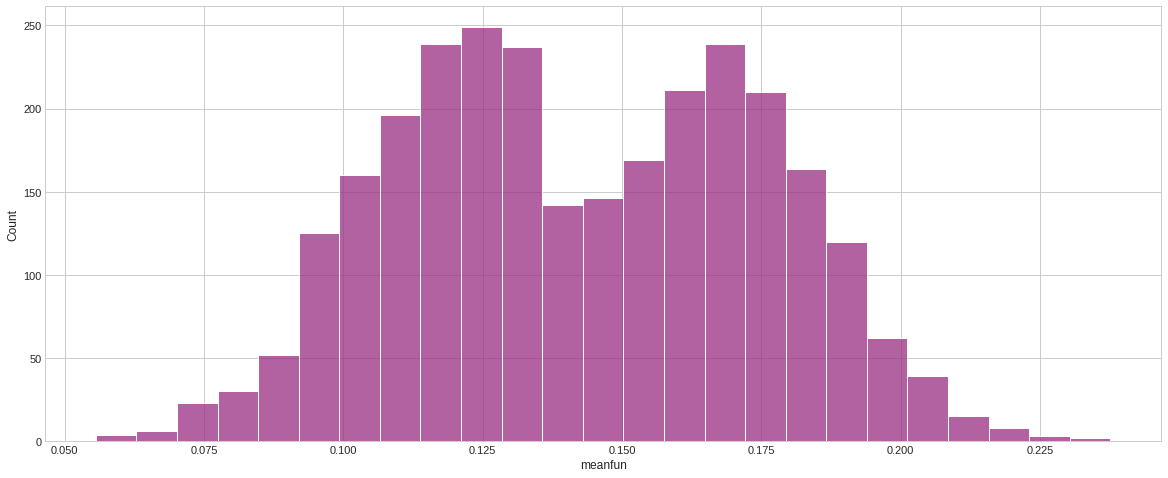

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(df.meanfun, color=sns.color_palette('magma')[2])
plt.show()

# Classifying

# Building and fitting the models

Logistic Regression
**bold text**
Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1.

In [ ]:
regressionModel = LogisticRegression(solver='liblinear')
regressionModel.fit(xTrain,yTrain)
regressionModel.score(xTrain,yTrain)

0.9763157894736842

**The K-nearest neighbours**

The K-nearest neighbours (KNN) classifier uses proximity to make classifications or predictions about independent data points. This technique may be used for both classification and regression scenarios and the output will vary. In classification instances, a decision is made based on majority vote, i.e., the class assigned to the new data point is taken to be the one that is most frequently seen in the vicinity of the point. KNN is also known as a lazy learner technique since a model is not learned. Instead, the raw data is stored and used everytime a prediction must be made.



In [ ]:
KNNModel = KNeighborsClassifier(n_neighbors=3)
KNNModel.fit(xTrain,yTrain)
KNNModel.score(xTrain,yTrain)

0.9991228070175439

**Support Vector Classifier**

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane. SVM chooses the extreme points/vectors that help in creating the hyperplane.



In [ ]:
svmLinearModel=sklearn.svm.SVC(kernel='linear',C=10)
svmLinearModel.fit(xTrain,yTrain)
svmLinearModel.score(xTrain,yTrain)

1.0

In [ ]:
svmRbfModel=sklearn.svm.SVC(kernel='rbf',C=10)
svmRbfModel.fit(xTrain,yTrain)
svmRbfModel.score(xTrain,yTrain)

0.999561403508772

In [ ]:
svmPolyModel=sklearn.svm.SVC(kernel='poly',C=10000)
svmPolyModel.fit(xTrain,yTrain)
svmPolyModel.score(xTrain,yTrain)

0.999561403508772

**Random forest classifier**

The random forest classifier is an improvement over decision tree classifiers. Based on ensemble learning, a random forest classifier contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset. In general, a greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

In [ ]:
randomFModel = RandomForestClassifier()
randomFModel.fit(xTrain, yTrain)
randomFModel.score(xTrain,yTrain)

1.0

**Decision tree classifier**

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [ ]:
dTreeModel = DecisionTreeClassifier()
dTreeModel.fit(xTrain, yTrain)
dTreeModel.score(xTrain,yTrain)

1.0

# Performance Analysis of the different models

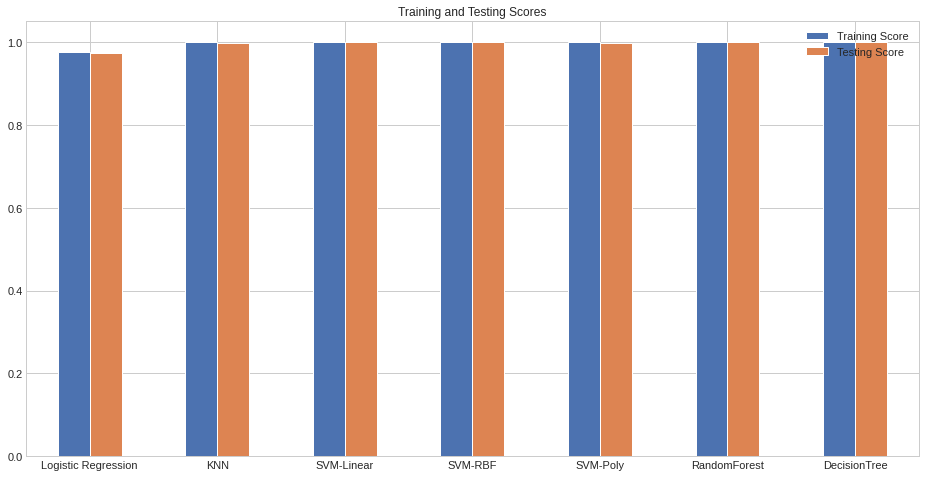

In [ ]:
trainScores = [regressionModel.score(xTrain, yTrain), KNNModel.score(xTrain, yTrain), svmLinearModel.score(xTrain, yTrain), svmRbfModel.score(xTrain, yTrain),svmPolyModel.score(xTrain, yTrain), randomFModel.score(xTrain,yTrain), dTreeModel.score(xTrain,yTrain)]
testScores = [regressionModel.score(xTest, yTest), KNNModel.score(xTest, yTest), svmLinearModel.score(xTest, yTest), svmRbfModel.score(xTest, yTest),svmPolyModel.score(xTest, yTest), randomFModel.score(xTest,yTest), dTreeModel.score(xTest,yTest)]
indices = ['Logistic Regression', 'KNN', 'SVM-Linear', 'SVM-RBF','SVM-Poly', 'RandomForest', 'DecisionTree']
scores = pd.DataFrame({'Training Score': trainScores,'Testing Score': testScores}, index=indices)
plot = scores.plot.bar(figsize=(16, 8), rot=0)
plt.title('Training and Testing Scores')
plt.show()

**Scores**

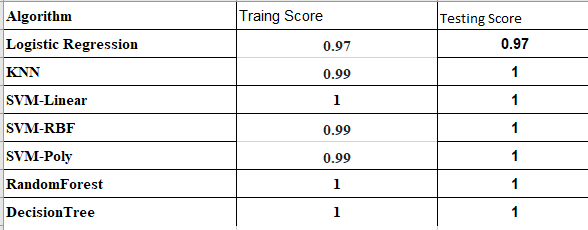

**Confusion Matrices**

In [ ]:
predRegression = regressionModel.predict(xTest)
predSVMLinear = svmLinearModel.predict(xTest)
predSVMRbf = svmRbfModel.predict(xTest)
predKNN = KNNModel.predict(xTest)
predSVMPoly = svmPolyModel.predict(xTest)
predRandomF = randomFModel.predict(xTest)
predDTree = dTreeModel.predict(xTest)
predVals = pd.DataFrame(data={'truth': yTest, 'regression': predRegression, 'knn': predKNN, 'svm-linear': predSVMLinear, 'svm-rbf': predSVMRbf, 'svm-poly': predSVMPoly, 'random-forest': predRandomF, 'decision-tree': predDTree})

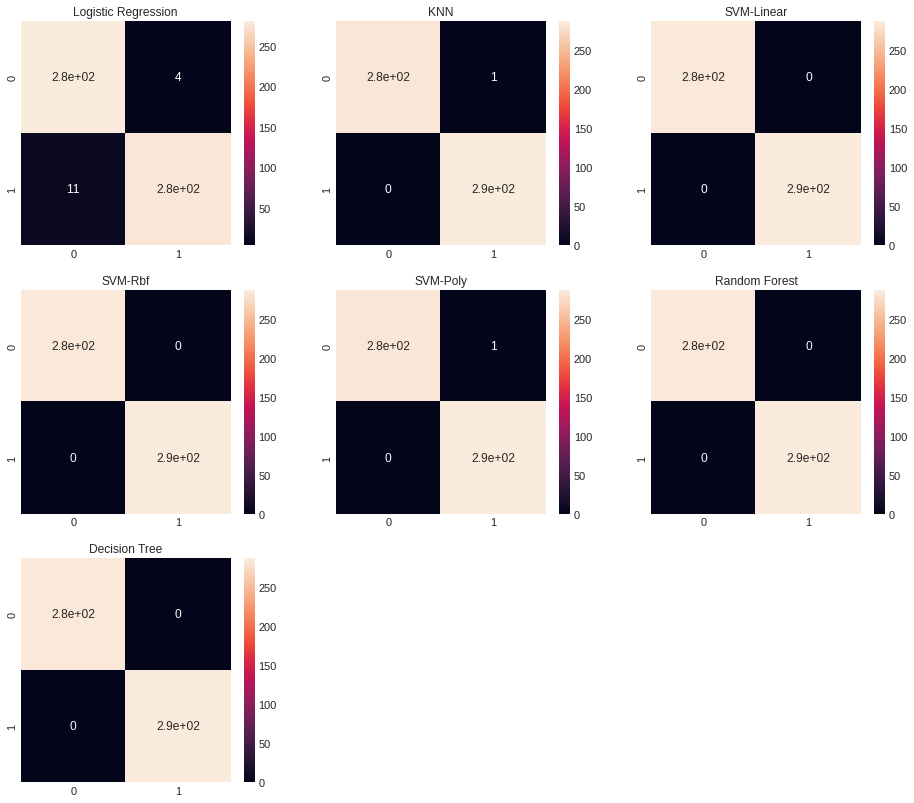

In [ ]:
plt.figure(figsize=(16, 14))
plt.subplot(3, 3, 1)
sns.heatmap(sklearn.metrics.confusion_matrix(yTest, predRegression), annot=True).set(title='Logistic Regression')
plt.subplot(3, 3, 2)
sns.heatmap(sklearn.metrics.confusion_matrix(yTest, predKNN), annot=True).set(title='KNN')
plt.subplot(3, 3, 3)
sns.heatmap(sklearn.metrics.confusion_matrix(yTest, predSVMLinear), annot=True).set(title='SVM-Linear')
plt.subplot(3, 3, 4)
sns.heatmap(sklearn.metrics.confusion_matrix(yTest, predSVMRbf), annot=True).set(title='SVM-Rbf')
plt.subplot(3, 3, 5)
sns.heatmap(sklearn.metrics.confusion_matrix(yTest, predSVMPoly), annot=True).set(title='SVM-Poly')
plt.subplot(3, 3, 6)
sns.heatmap(sklearn.metrics.confusion_matrix(yTest, predRandomF), annot=True).set(title='Random Forest')
plt.subplot(3, 3, 7)
sns.heatmap(sklearn.metrics.confusion_matrix(yTest, predDTree), annot=True).set(title='Decision Tree')
plt.show()

**Classification reports**

In [ ]:
print("Logistic Regression:\n\n", sklearn.metrics.classification_report(yTest, predRegression))

Logistic Regression:

               precision    recall  f1-score   support

           0       0.96      0.99      0.97       284
           1       0.99      0.96      0.97       287

    accuracy                           0.97       571
   macro avg       0.97      0.97      0.97       571
weighted avg       0.97      0.97      0.97       571



In [ ]:
print("KNN:\n\n", sklearn.metrics.classification_report(yTest, predKNN))

KNN:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       1.00      1.00      1.00       287

    accuracy                           1.00       571
   macro avg       1.00      1.00      1.00       571
weighted avg       1.00      1.00      1.00       571



In [ ]:
print("SVM with linear kernel:\n\n", sklearn.metrics.classification_report(yTest, predSVMLinear))

SVM with linear kernel:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       1.00      1.00      1.00       287

    accuracy                           1.00       571
   macro avg       1.00      1.00      1.00       571
weighted avg       1.00      1.00      1.00       571



In [ ]:
print("SVM with RBF kernel:\n\n", sklearn.metrics.classification_report(yTest, predSVMRbf))

SVM with RBF kernel:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       1.00      1.00      1.00       287

    accuracy                           1.00       571
   macro avg       1.00      1.00      1.00       571
weighted avg       1.00      1.00      1.00       571



In [ ]:
print("SVM with poly kernel:\n\n", sklearn.metrics.classification_report(yTest, predSVMPoly))

SVM with poly kernel:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       1.00      1.00      1.00       287

    accuracy                           1.00       571
   macro avg       1.00      1.00      1.00       571
weighted avg       1.00      1.00      1.00       571



In [ ]:
print("Random Forest:\n\n", sklearn.metrics.classification_report(yTest, predRandomF))

Random Forest:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       1.00      1.00      1.00       287

    accuracy                           1.00       571
   macro avg       1.00      1.00      1.00       571
weighted avg       1.00      1.00      1.00       571



In [ ]:
print("Decision Tree:\n\n", sklearn.metrics.classification_report(yTest, predDTree))

Decision Tree:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       1.00      1.00      1.00       287

    accuracy                           1.00       571
   macro avg       1.00      1.00      1.00       571
weighted avg       1.00      1.00      1.00       571



# **Overview of predictions**

In [ ]:
predVals.head()

,truth,regression,knn,svm-linear,svm-rbf,svm-poly,random-forest,decision-tree
692,0,0,0,0,0,0,0,0
623,1,1,1,1,1,1,1,1
1142,0,0,0,0,0,0,0,0
2113,1,1,1,1,1,1,1,1
2240,0,0,0,0,0,0,0,0


# **Conclusion**

Based on our analysis, we can conclude that the Logistic Regression is best-suited for this work.